In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import he_normal
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential 
from keras.layers import Dense, Activation,Dropout 
#from pactools.grid_search import GridSearchCVProgressBar

Using TensorFlow backend.


In [0]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid(linestyle='-')
    fig.canvas.draw()

**Observations:** This gives a dynamic plot of values specified.

# Loading the data

In [4]:
# the data, shuffled and split between train and test sets 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


**Observations:** Getting the trainand test data of MNIST dataset.

In [0]:
print('Total amount of train data is {} and shape of each image is ({},{}).'.format(x_train.shape[0],x_train.shape[1],x_train.shape[2]))

Total amount of train data is 60000 and shape of each image is (28,28).


In [5]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) 
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]) 
print('Total amount of train data is {} and shape of each image is {}.'.format(x_train.shape[0],x_train.shape[1]))

Total amount of train data is 60000 and shape of each image is 784.


In [0]:
x_train = x_train/255 #Apply data normalization. X => (X - Xmin)/(Xmax-Xmin) = X/255
x_test = x_test/255

**Observations:** Since the value of pixels lie between 0-255, data needs to be normalized.

In [7]:
# here we are having a class number for each image
print("Class label of 49th image :", y_train[49])
#These need to be converted into a vector.

y_train_cat = np_utils.to_categorical(y_train, 10) 
y_test_cat = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",y_train_cat[49])

Class label of 49th image : 3
After converting the output into a vector :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


**Observations:** Convert each label to a vector

# 2 Hidden layers

In [0]:
output_dim = 10
input_dim = x_train.shape[1]
batch_size = 120
nb_epoch = 20

## With Batch normalization, Dropouts

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def model_keras(l1,l2):

    model = Sequential()
    model.add(Dense(l1, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal())) #Uses Relu activation and he normalization as kernel initializer
    model.add(BatchNormalization()) #Perform Batch normalization
    model.add(Dropout(0.5)) #Add dropouts
    
    model.add(Dense(l2, activation='relu', kernel_initializer=he_normal()) )
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [13]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=model_keras, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = {'l1': [256,328,512], 'l2': [32,64,128]}

gsearch = GridSearchCV(estimator=model, param_grid=param_grid)
gresult = gsearch.fit(x_train, y_train_cat)

print("Best Accuracy obtained is {} when number of units in layer 1 and 2 are {}.\n".format(gresult.best_score_, gresult.best_params_))
scores = gresult.cv_results_['mean_test_score']
params = gresult.cv_results_['params']
for score, param in zip(scores, params):
    print('Accuracy of {} is obtained for number of units in hidden layer 1 and 2 as {}'.format(score,param))

Best Accuracy obtained is 0.9782833398580552 when number of units in layer 1 and 2 are {'l1': 512, 'l2': 128}.

Accuracy of 0.9741666691303253 is obtained for number of units in hidden layer 1 and 2 as {'l1': 256, 'l2': 32}
Accuracy of 0.9760500049591064 is obtained for number of units in hidden layer 1 and 2 as {'l1': 256, 'l2': 64}
Accuracy of 0.9762000054121017 is obtained for number of units in hidden layer 1 and 2 as {'l1': 256, 'l2': 128}
Accuracy of 0.9747833367586136 is obtained for number of units in hidden layer 1 and 2 as {'l1': 328, 'l2': 32}
Accuracy of 0.9759500049750011 is obtained for number of units in hidden layer 1 and 2 as {'l1': 328, 'l2': 64}
Accuracy of 0.9774500041007995 is obtained for number of units in hidden layer 1 and 2 as {'l1': 328, 'l2': 128}
Accuracy of 0.9775000061988831 is obtained for number of units in hidden layer 1 and 2 as {'l1': 512, 'l2': 32}
Accuracy of 0.9777333381573359 is obtained for number of units in hidden layer 1 and 2 as {'l1': 512, 

In [14]:
best_model = model_keras(gresult.best_params_['l1'],gresult.best_params_['l2'])
model_fit = best_model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.4246 - acc: 0.8727 - val_loss: 0.1415 - val_acc: 0.9550
Epoch 2/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.2038 - acc: 0.9393 - val_loss: 0.0999 - val_acc: 0.9679
Epoch 3/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1586 - acc: 0.9521 - val_loss: 0.0844 - val_acc: 0.9741
Epoch 4/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.1350 - acc: 0.9592 - val_loss: 0.0812 - val_acc: 0.9741
Epoch 5/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.1191 - acc: 0.9642 - val_loss: 0.0751 - val_acc: 0.9742
Epoch 6/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.1083 - acc: 0.9662 - val_loss: 0.0695 - val_acc: 0.9766
Epoch 7/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.0990 - acc: 0.9704 - val_loss: 0.0650 -

Test score: 0.05760298303969903
Test accuracy: 0.9833


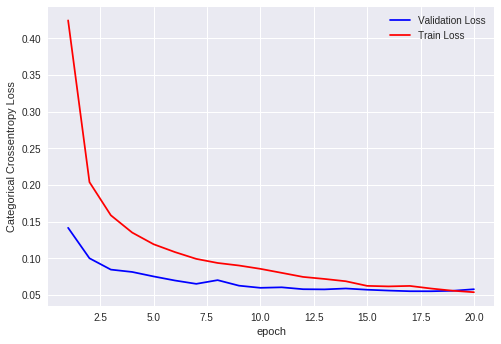

In [19]:
import matplotlib.pyplot as plt
model_scores = best_model.evaluate(x_test, y_test_cat, verbose=0) 
print('Test score:', model_scores[0]) 
print('Test accuracy:', model_scores[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

**Observations:** This plot seems do okay but might overfit as epochs are increased.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


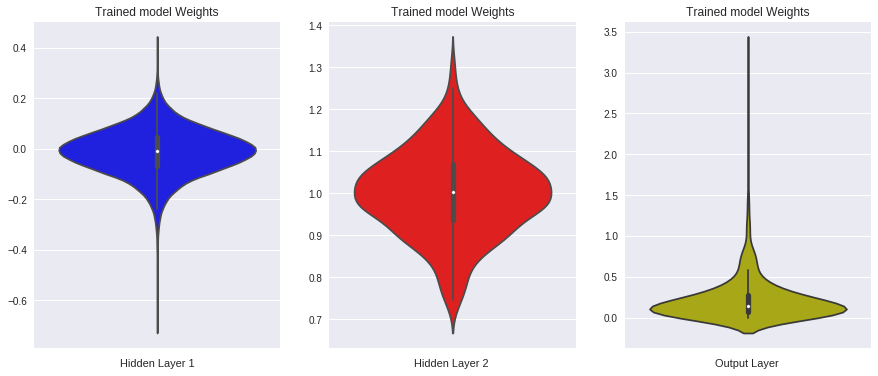

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = best_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Without Dropouts

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def model_keras(l1,l2):

    model = Sequential()
    model.add(Dense(l1, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    #model.add(Dropout(0.5))
    
    model.add(Dense(l2, activation='relu', kernel_initializer=he_normal()) )
    model.add(BatchNormalization())
    #model.add(Dropout(0.5))
    
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model
    #Taking longer time without dropouts than without batch normalization

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=model_keras, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = {'l1': [256,328,512], 'l2': [32,64,128]}

gsearch = GridSearchCV(estimator=model, param_grid=param_grid)
gresult = gsearch.fit(x_train, y_train_cat)

print("Best Accuracy obtained is {} when number of units in layer 1 and 2 are {}.\n".format(gresult.best_score_, gresult.best_params_))
scores = gresult.cv_results_['mean_test_score']
params = gresult.cv_results_['params']
for score, param in zip(scores, params):
    print('Accuracy of {} is obtained for number of units in hidden layer 1 and 2 as {}'.format(score,param))


Best Accuracy obtained is 0.9772333382368088 when number of units in layer 1 and 2 are {'l1': 512, 'l2': 64}.

Accuracy of 0.9727000021934509 is obtained for number of units in hidden layer 1 and 2 as {'l1': 256, 'l2': 32}
Accuracy of 0.9740666691462199 is obtained for number of units in hidden layer 1 and 2 as {'l1': 256, 'l2': 64}
Accuracy of 0.9738666696548461 is obtained for number of units in hidden layer 1 and 2 as {'l1': 256, 'l2': 128}
Accuracy of 0.9722666690746943 is obtained for number of units in hidden layer 1 and 2 as {'l1': 328, 'l2': 32}
Accuracy of 0.9757666704654694 is obtained for number of units in hidden layer 1 and 2 as {'l1': 328, 'l2': 64}
Accuracy of 0.9749000025192897 is obtained for number of units in hidden layer 1 and 2 as {'l1': 328, 'l2': 128}
Accuracy of 0.9744166692892711 is obtained for number of units in hidden layer 1 and 2 as {'l1': 512, 'l2': 32}
Accuracy of 0.9772333382368088 is obtained for number of units in hidden layer 1 and 2 as {'l1': 512, '

**Observations:** Best accuracy seems to be obtained for 512 units in hidden layer 1 and 64 units in hidden layer 2.

In [0]:
best_model = model_keras(gresult.best_params_['l1'],gresult.best_params_['l2']) #Perform on the best number of units for respective layers
model_fit = best_model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.2054 - acc: 0.9408 - val_loss: 0.1002 - val_acc: 0.9687
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0752 - acc: 0.9771 - val_loss: 0.0844 - val_acc: 0.9722
Epoch 3/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0497 - acc: 0.9853 - val_loss: 0.0761 - val_acc: 0.9771
Epoch 4/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0375 - acc: 0.9882 - val_loss: 0.0735 - val_acc: 0.9777
Epoch 5/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0276 - acc: 0.9914 - val_loss: 0.0765 - val_acc: 0.9787
Epoch 6/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0255 - acc: 0.9917 - val_loss: 0.0860 - val_acc: 0.9761
Epoch 7/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0203 - acc: 0.9936 - val_loss: 0.0786 -

Test score: 0.06981187216847902
Test accuracy: 0.982


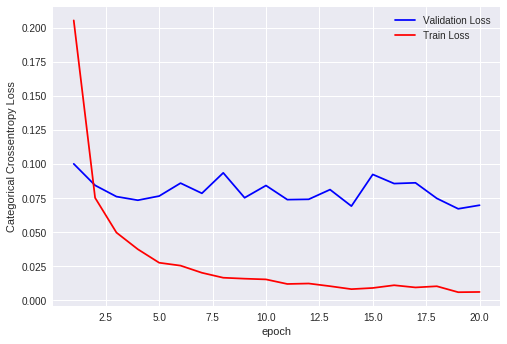

In [0]:
import matplotlib.pyplot as plt
model_scores = best_model.evaluate(x_test, y_test_cat, verbose=0) 
print('Test score:', model_scores[0]) 
print('Test accuracy:', model_scores[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

**Observations:** The models looks to be severely overfit.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


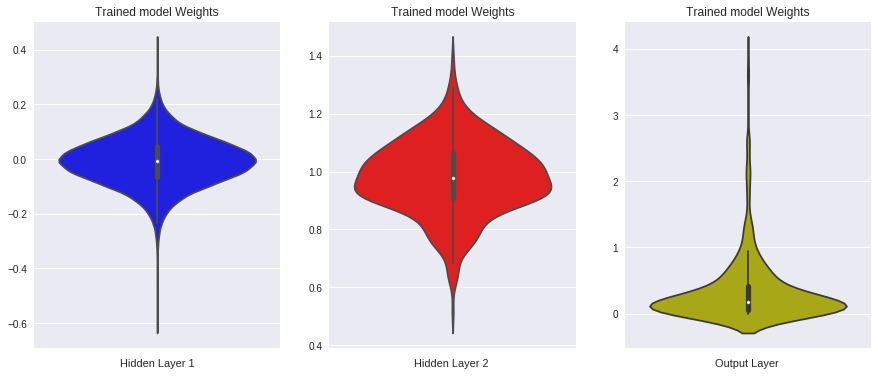

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = best_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Observations:** The weights seem to be evenly spread.

## Without Batch Normalization

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def model_keras(l1,l2):

    model = Sequential()
    model.add(Dense(l1, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
    #model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(l2, activation='relu', kernel_initializer=he_normal()) )
    #model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [0]:
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam,RMSprop,SGD
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential 
from keras.layers import Dense, Activation,Dropout 

model = KerasClassifier(build_fn=model_keras, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = {'l1': [256,328,512], 'l2': [32,64,128]}

gsearch = GridSearchCV(estimator=model, param_grid=param_grid)
gresult = gsearch.fit(x_train, y_train_cat)

print("Best Accuracy obtained is {} when number of units in layer 1 and 2 are {}.\n".format(gresult.best_score_, gresult.best_params_))
scores = gresult.cv_results_['mean_test_score']
params = gresult.cv_results_['params']
for score, param in zip(scores, params):
    print('Accuracy of {} is obtained for number of units in hidden layer 1 and 2 as {}'.format(score,param))


Best Accuracy obtained is 0.9779500048160553 when number of units in layer 1 and 2 are {'l1': 512, 'l2': 128}.

Accuracy of 0.9717666691541672 is obtained for number of units in hidden layer 1 and 2 as {'l1': 256, 'l2': 32}
Accuracy of 0.9739000020027161 is obtained for number of units in hidden layer 1 and 2 as {'l1': 256, 'l2': 64}
Accuracy of 0.9762000044584275 is obtained for number of units in hidden layer 1 and 2 as {'l1': 256, 'l2': 128}
Accuracy of 0.974183337132136 is obtained for number of units in hidden layer 1 and 2 as {'l1': 328, 'l2': 32}
Accuracy of 0.9759166709184647 is obtained for number of units in hidden layer 1 and 2 as {'l1': 328, 'l2': 64}
Accuracy of 0.9770166708628336 is obtained for number of units in hidden layer 1 and 2 as {'l1': 328, 'l2': 128}
Accuracy of 0.9751333359479905 is obtained for number of units in hidden layer 1 and 2 as {'l1': 512, 'l2': 32}
Accuracy of 0.9766833366552988 is obtained for number of units in hidden layer 1 and 2 as {'l1': 512, '

In [0]:
best_model = model_keras(gresult.best_params_['l1'],gresult.best_params_['l2'])
model_fit = best_model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.4562 - acc: 0.8592 - val_loss: 0.1478 - val_acc: 0.9520
Epoch 2/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.2076 - acc: 0.9388 - val_loss: 0.1034 - val_acc: 0.9689
Epoch 3/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.1567 - acc: 0.9543 - val_loss: 0.0872 - val_acc: 0.9731
Epoch 4/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1356 - acc: 0.9609 - val_loss: 0.0796 - val_acc: 0.9760
Epoch 5/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.1159 - acc: 0.9657 - val_loss: 0.0761 - val_acc: 0.9772
Epoch 6/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.1063 - acc: 0.9683 - val_loss: 0.0746 - val_acc: 0.9782
Epoch 7/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.0961 - acc: 0.9715 - val_loss: 0.0715 - 

Test score: 0.06639465064615924
Test accuracy: 0.9831


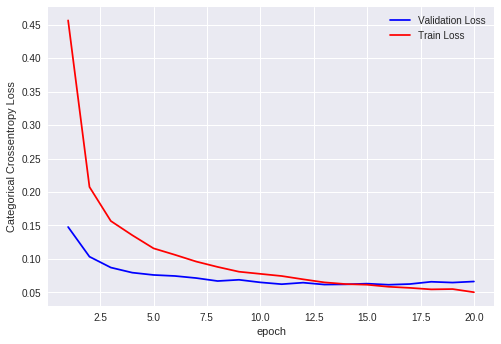

In [0]:
import matplotlib.pyplot as plt
model_scores = best_model.evaluate(x_test, y_test_cat, verbose=0) 
print('Test score:', model_scores[0]) 
print('Test accuracy:', model_scores[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

**Observations:** The model seems to be doing okay. As validation error seems to be increasing in the end, there is a chance for overfitting as the number of epochs increase.

In [0]:
best_model = model_keras(gresult.best_params_['l1'],gresult.best_params_['l2'])
model_fit = best_model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=30, verbose=0, validation_data=(x_test, y_test_cat)) #Performing on 30 epochs

Test score: 0.06680203758674061
Test accuracy: 0.9845


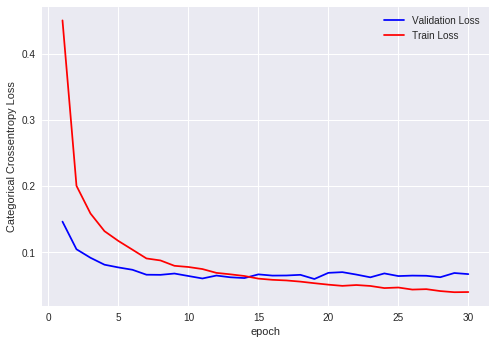

In [0]:
import matplotlib.pyplot as plt
model_scores = best_model.evaluate(x_test, y_test_cat, verbose=0) 
print('Test score:', model_scores[0]) 
print('Test accuracy:', model_scores[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,31))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

Observations: Performing on 30 epochs confirmed that the model is overfitting.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


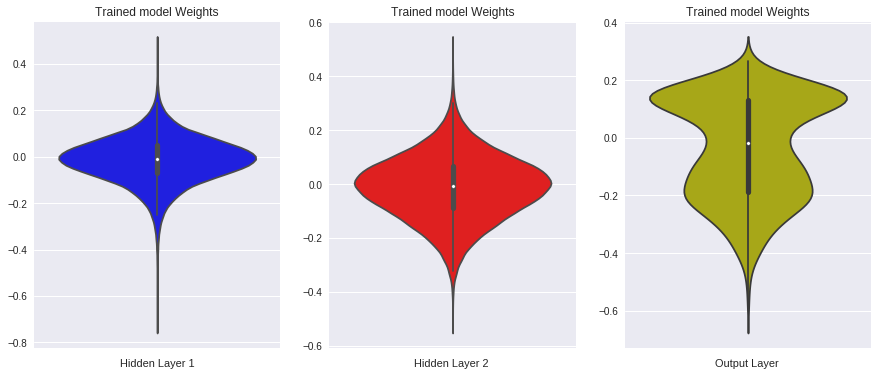

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = best_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Observations:** No abnormal distribution in weights observed.

# 3 Hidden layers

## With Batch Normalization and Dropouts

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential 
from keras.layers import Dense, Activation,Dropout 

def model_keras(l1,l2,l3):

    model = Sequential()
    model.add(Dense(l1, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(l2, activation='relu', kernel_initializer=he_normal()) )
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(l3, activation='relu', kernel_initializer=he_normal()) )
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=model_keras, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = {'l1': [256,328,512], 'l2': [32,64,128], 'l3': [8,16]}

gsearch = GridSearchCV(estimator=model, param_grid=param_grid)
gresult = gsearch.fit(x_train, y_train_cat)

print("Best Accuracy obtained is {} when number of units in layer 1, 2, 3 are {}.\n".format(gresult.best_score_, gresult.best_params_))
scores = gresult.cv_results_['mean_test_score']
params = gresult.cv_results_['params']
for score, param in zip(scores, params):
    print('Accuracy of {} is obtained for number of units in hidden layer 1, 2, 3 as {}'.format(score,param))

Best Accuracy obtained is 0.9760500040054322 when number of units in layer 1, 2, 3 are {'l1': 512, 'l2': 128, 'l3': 16}.

Accuracy of 0.9683333340883254 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 32, 'l3': 8}
Accuracy of 0.9704833352565765 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 32, 'l3': 16}
Accuracy of 0.9689166665077209 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 64, 'l3': 8}
Accuracy of 0.9718500011364619 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 64, 'l3': 16}
Accuracy of 0.9710500012636185 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 128, 'l3': 8}
Accuracy of 0.973583336353302 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 128, 'l3': 16}
Accuracy of 0.9686333343982697 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 328, 'l2': 32, 'l3': 8}
Accuracy of 0.9702000017563

In [0]:
best_model = model_keras(gresult.best_params_['l1'],gresult.best_params_['l2'],gresult.best_params_['l3'])
model_fit = best_model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 35s 585us/step - loss: 0.9511 - acc: 0.7090 - val_loss: 0.2132 - val_acc: 0.9409
Epoch 2/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.4561 - acc: 0.8713 - val_loss: 0.1498 - val_acc: 0.9560
Epoch 3/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.3475 - acc: 0.9026 - val_loss: 0.1218 - val_acc: 0.9652
Epoch 4/20
60000/60000 [==============================] - 16s 264us/step - loss: 0.3050 - acc: 0.9158 - val_loss: 0.1171 - val_acc: 0.9669
Epoch 5/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.2710 - acc: 0.9267 - val_loss: 0.1090 - val_acc: 0.9693
Epoch 6/20
60000/60000 [==============================] - 15s 251us/step - loss: 0.2528 - acc: 0.9301 - val_loss: 0.0901 - val_acc: 0.9750
Epoch 7/20
60000/60000 [==============================] - 15s 251us/step - loss: 0.2311 - acc: 0.9358 - val_loss: 0.

Test score: 0.07347509580666083
Test accuracy: 0.9821


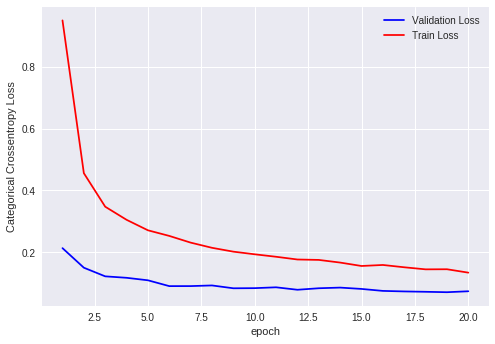

In [0]:
import matplotlib.pyplot as plt
model_scores = best_model.evaluate(x_test, y_test_cat, verbose=0) 
print('Test score:', model_scores[0]) 
print('Test accuracy:', model_scores[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

**Observations:** The model performed well, no traces of overfit.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


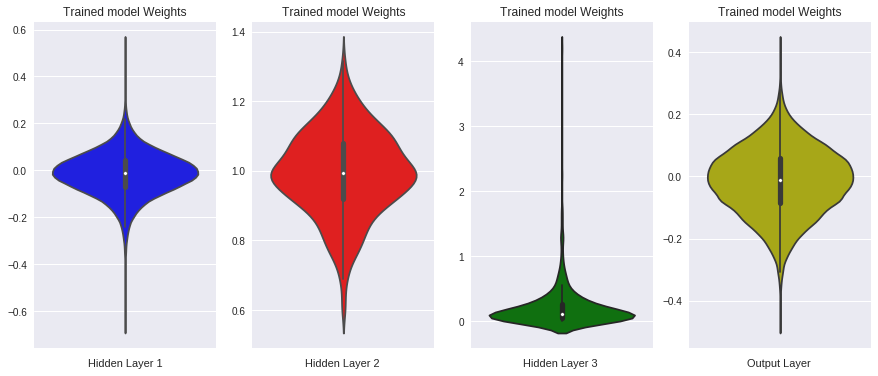

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
#w_after = best_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Without Droputs

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential 
from keras.layers import Dense, Activation,Dropout 

def model_keras(l1,l2,l3):

    model = Sequential()
    model.add(Dense(l1, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    #model.add(Dropout(0.5))
    
    model.add(Dense(l2, activation='relu', kernel_initializer=he_normal()) )
    model.add(BatchNormalization())
    #model.add(Dropout(0.5))
    
    model.add(Dense(l3, activation='relu', kernel_initializer=he_normal()) )
    model.add(BatchNormalization())
    #model.add(Dropout(0.5))
    
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

start = time.time()
model = KerasClassifier(build_fn=model_keras, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = {'l1': [256,328,512], 'l2': [32,64,128], 'l3': [8,16]}

gsearch = GridSearchCV(estimator=model, param_grid=param_grid)
gresult = gsearch.fit(x_train, y_train_cat)

print("Best Accuracy obtained is {} when number of units in layer 1, 2, 3 are {}.\n".format(gresult.best_score_, gresult.best_params_))
scores = gresult.cv_results_['mean_test_score']
params = gresult.cv_results_['params']
for score, param in zip(scores, params):
    print('Accuracy of {} is obtained for number of units in hidden layer 1, 2, 3 as {}'.format(score,param))
print('\nTotal time taken for execution is',time.time()-start)

Best Accuracy obtained is 0.9762000038623809 when number of units in layer 1, 2, 3 are {'l1': 328, 'l2': 128, 'l3': 16}.

Accuracy of 0.9725333353678386 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 32, 'l3': 8}
Accuracy of 0.9747666693925857 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 32, 'l3': 16}
Accuracy of 0.9741500035524369 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 64, 'l3': 8}
Accuracy of 0.9741000036795934 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 64, 'l3': 16}
Accuracy of 0.975166669289271 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 128, 'l3': 8}
Accuracy of 0.9740833355585734 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 128, 'l3': 16}
Accuracy of 0.9720166695515314 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 328, 'l2': 32, 'l3': 8}
Accuracy of 0.9746500035127

In [0]:
best_model = model_keras(gresult.best_params_['l1'],gresult.best_params_['l2'],gresult.best_params_['l3'])
model_fit = best_model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 35s 582us/step - loss: 0.3122 - acc: 0.9250 - val_loss: 0.1247 - val_acc: 0.9658
Epoch 2/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0943 - acc: 0.9732 - val_loss: 0.0932 - val_acc: 0.9720
Epoch 3/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.0608 - acc: 0.9816 - val_loss: 0.0863 - val_acc: 0.9731
Epoch 4/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.0455 - acc: 0.9859 - val_loss: 0.0842 - val_acc: 0.9743
Epoch 5/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.0346 - acc: 0.9895 - val_loss: 0.0822 - val_acc: 0.9748
Epoch 6/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0295 - acc: 0.9907 - val_loss: 0.0762 - val_acc: 0.9768
Epoch 7/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0224 - acc: 0.9930 - val_loss: 0.

Test score: 0.08734963990088727
Test accuracy: 0.9793


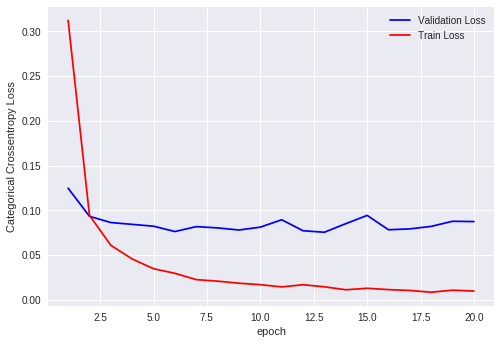

In [0]:
import matplotlib.pyplot as plt
model_scores = best_model.evaluate(x_test, y_test_cat, verbose=0) 
print('Test score:', model_scores[0]) 
print('Test accuracy:', model_scores[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

**Observations:** The model seems to be severely overfit without dropouts.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


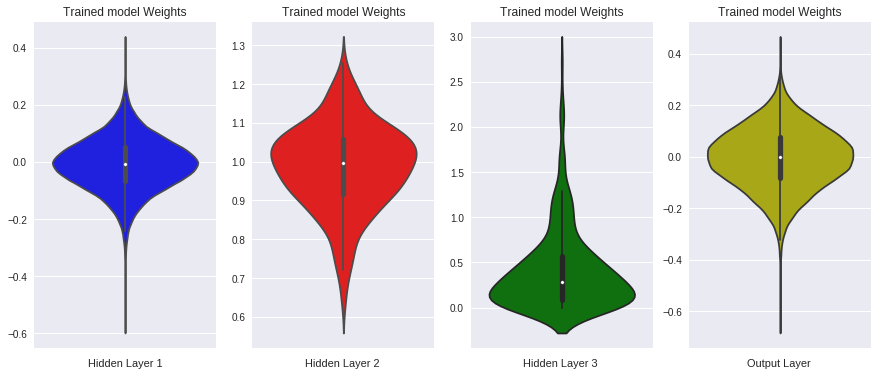

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = best_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Without Batch Normalization

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential 
from keras.layers import Dense, Activation,Dropout 

def model_keras(l1,l2,l3):

    model = Sequential()
    model.add(Dense(l1, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
    #model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(l2, activation='relu', kernel_initializer=he_normal()) )
    #model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(l3, activation='relu', kernel_initializer=he_normal()) )
    #model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

start = time.time()
model = KerasClassifier(build_fn=model_keras, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = {'l1': [256,328,512], 'l2': [32,64,128], 'l3': [8,16]}

gsearch = GridSearchCV(estimator=model, param_grid=param_grid)
gresult = gsearch.fit(x_train, y_train_cat)

print("Best Accuracy obtained is {} when number of units in layer 1, 2, 3 are {}.\n".format(gresult.best_score_, gresult.best_params_))
scores = gresult.cv_results_['mean_test_score']
params = gresult.cv_results_['params']
for score, param in zip(scores, params):
    print('Accuracy of {} is obtained for number of units in hidden layer 1, 2, 3 as {}'.format(score,param))
print('\nTotal time taken for execution is',time.time()-start)

Best Accuracy obtained is 0.973083335518837 when number of units in layer 1, 2, 3 are {'l1': 512, 'l2': 128, 'l3': 16}.

Accuracy of 0.9522499965826671 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 32, 'l3': 8}
Accuracy of 0.9621166644493738 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 32, 'l3': 16}
Accuracy of 0.9578666624625524 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 64, 'l3': 8}
Accuracy of 0.9660999994277955 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 64, 'l3': 16}
Accuracy of 0.9581833295027415 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 128, 'l3': 8}
Accuracy of 0.9679333331584931 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 256, 'l2': 128, 'l3': 16}
Accuracy of 0.9565499978462855 is obtained for number of units in hidden layer 1, 2, 3 as {'l1': 328, 'l2': 32, 'l3': 8}
Accuracy of 0.9658499991893

In [0]:
best_model = model_keras(gresult.best_params_['l1'],gresult.best_params_['l2'],gresult.best_params_['l3'])
model_fit = best_model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 30s 492us/step - loss: 1.1250 - acc: 0.6032 - val_loss: 0.2463 - val_acc: 0.9375
Epoch 2/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.6235 - acc: 0.7917 - val_loss: 0.1766 - val_acc: 0.9536
Epoch 3/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.5140 - acc: 0.8265 - val_loss: 0.1598 - val_acc: 0.9600
Epoch 4/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.4707 - acc: 0.8403 - val_loss: 0.1392 - val_acc: 0.9665
Epoch 5/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.4292 - acc: 0.8559 - val_loss: 0.1325 - val_acc: 0.9677
Epoch 6/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.4025 - acc: 0.8670 - val_loss: 0.1385 - val_acc: 0.9696
Epoch 7/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.3796 - acc: 0.8746 - val_loss: 0.11

Test score: 0.11908461541022407
Test accuracy: 0.9793


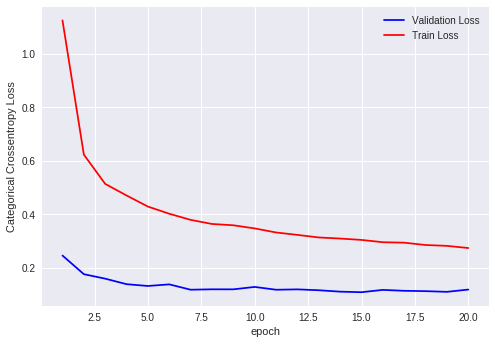

In [0]:
import matplotlib.pyplot as plt
model_scores = best_model.evaluate(x_test, y_test_cat, verbose=0) 
print('Test score:', model_scores[0]) 
print('Test accuracy:', model_scores[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

**Observations:** The model seemed to perform well without batch normalization. But there is chance for overfit as the number of epochs increase to a greater number.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


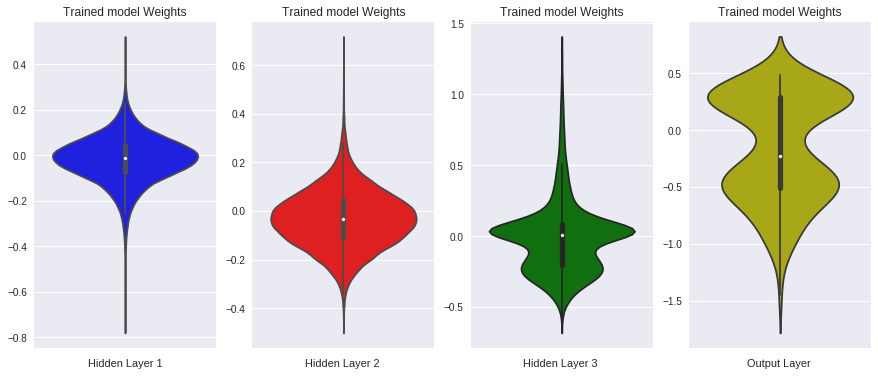

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = best_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 5 Hidden layers

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential 
from keras.layers import Dense, Activation,Dropout 

def model_keras(l1,l2,l3,l4,l5):

    model = Sequential()
    model.add(Dense(l1, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(l2, activation='relu', kernel_initializer=he_normal()) )
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(l3, activation='relu', kernel_initializer=he_normal()) )
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(l4, activation='relu', kernel_initializer=he_normal()) )
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(l5, activation='relu', kernel_initializer=he_normal()) )
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [12]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=model_keras, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = {'l1': [328,512], 'l2': [128,256], 'l3':[64,96], 'l4': [16,32], 'l5':[4,8]}

gsearch = GridSearchCV(estimator=model, param_grid=param_grid)
gresult = gsearch.fit(x_train, y_train_cat)

print("Best Accuracy obtained is {} when number of units in layer 1, 2, 3, 4, 5 are {}.\n".format(gresult.best_score_, gresult.best_params_))
scores = gresult.cv_results_['mean_test_score']
params = gresult.cv_results_['params']
for score, param in zip(scores, params):
    print('Accuracy of {} is obtained for number of units in hidden layer 1, 2, 3, 4, 5 as {}'.format(score,param))

Best Accuracy obtained is 0.9714500022331873 when number of units in layer 1, 2, 3, 4, 5 are {'l1': 512, 'l2': 256, 'l3': 96, 'l4': 32, 'l5': 8}.

Accuracy of 0.8723500003814697 is obtained for number of units in hidden layer 1, 2, 3, 4, 5 as {'l1': 328, 'l2': 128, 'l3': 64, 'l4': 16, 'l5': 4}
Accuracy of 0.9492666640679042 is obtained for number of units in hidden layer 1, 2, 3, 4, 5 as {'l1': 328, 'l2': 128, 'l3': 64, 'l4': 16, 'l5': 8}
Accuracy of 0.9092166651884714 is obtained for number of units in hidden layer 1, 2, 3, 4, 5 as {'l1': 328, 'l2': 128, 'l3': 64, 'l4': 32, 'l5': 4}
Accuracy of 0.9665999997854233 is obtained for number of units in hidden layer 1, 2, 3, 4, 5 as {'l1': 328, 'l2': 128, 'l3': 64, 'l4': 32, 'l5': 8}
Accuracy of 0.8388833321332931 is obtained for number of units in hidden layer 1, 2, 3, 4, 5 as {'l1': 328, 'l2': 128, 'l3': 96, 'l4': 16, 'l5': 4}
Accuracy of 0.9170999986728032 is obtained for number of units in hidden layer 1, 2, 3, 4, 5 as {'l1': 328, 'l2':

In [13]:
best_model = model_keras(gresult.best_params_['l1'],gresult.best_params_['l2'],gresult.best_params_['l3'],gresult.best_params_['l4'],gresult.best_params_['l5'])
model_fit = best_model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 88s 1ms/step - loss: 1.7494 - acc: 0.3738 - val_loss: 0.7504 - val_acc: 0.8776
Epoch 2/20
60000/60000 [==============================] - 23s 392us/step - loss: 1.1585 - acc: 0.5784 - val_loss: 0.3925 - val_acc: 0.9314
Epoch 3/20
60000/60000 [==============================] - 24s 398us/step - loss: 0.9365 - acc: 0.6592 - val_loss: 0.2622 - val_acc: 0.9462
Epoch 4/20
60000/60000 [==============================] - 24s 393us/step - loss: 0.8257 - acc: 0.6995 - val_loss: 0.1902 - val_acc: 0.9583
Epoch 5/20
60000/60000 [==============================] - 23s 389us/step - loss: 0.7558 - acc: 0.7203 - val_loss: 0.1615 - val_acc: 0.9622
Epoch 6/20
60000/60000 [==============================] - 23s 391us/step - loss: 0.7131 - acc: 0.7328 - val_loss: 0.1517 - val_acc: 0.9648
Epoch 7/20
60000/60000 [==============================] - 24s 397us/step - loss: 0.6825 - acc: 0.7429 - val_loss: 0.14

Test score: 0.10571024847328662
Test accuracy: 0.9779


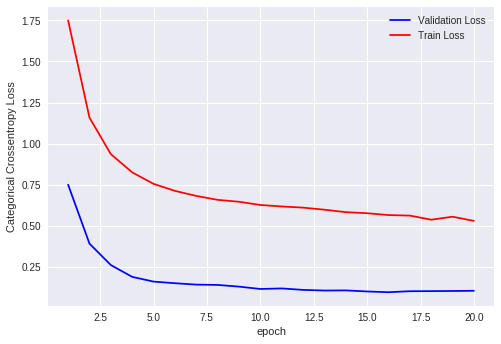

In [14]:
import matplotlib.pyplot as plt
model_scores = best_model.evaluate(x_test, y_test_cat, verbose=0) 
print('Test score:', model_scores[0]) 
print('Test accuracy:', model_scores[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = model_fit.history['val_loss']
ty = model_fit.history['loss']

plt_dynamic(x, vy, ty, ax)

**Observations:** The model performed well on test data.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


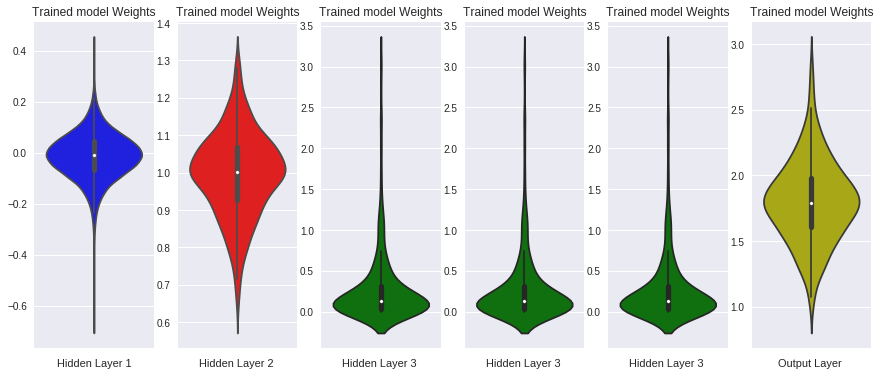

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
w_after = best_model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize = (15,6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Conclusions

1) Models **with Batch normalization and dropouts** seems to **perform better than others**.

2) Models **without dropouts** seem to **perform terribly** as they become **overfit**.

3) Models **without batch normalization** seems to **perform okay** but **chances of overfitting** as number of epochs increase.

4) Models with **only Batch normalization** takes a **lot of time** to compute compared to models with **only Dropouts**.

5) Model seems to **perform best** when number of **hidden layers is 3** with 512, 128, 16 units in layer 1, 2, 3 respectively with an **accuracy of 98.21%**.

In [7]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Number of hidden layers","Optimizations", "Accuracy", "Train error", "Test error", "Units in respective layers", "Performance"]
x.add_row([2, "With BN and Dropouts", "97.33%", "0.0535", "0.0576", "512, 128", "Marginal performance"])
x.add_row(["", "Without Dropouts", "98.20%", "0.0062", "0.0698", "512, 64", "Severely overfit"])
x.add_row(["", "Without BN", "98.31%", "0.0504", "0.0664", "512, 128","Chances of overfit as epochs increase"])
x.add_row(["", "", "", "", "", "", ""])
x.add_row([3, "With BN and Dropouts", "98.21%", "0.1338", "0.0735", "512, 128, 16", "Good performance"])
x.add_row(["", "Without Dropouts", "97.93%", "0.0097", "0.0873", "328, 128, 16", "Severely overfit"])
x.add_row(["", "Without BN", "97.93%", "0.2743", "0.1191", "512, 128, 16", "Good Performance"])
x.add_row(["", "", "", "", "", "", ""])
x.add_row([5, "With BN and Dropouts", "97.79%", "0.5305", "0.1057", "512, 256, 96, 32, 8", "Good Performance"])
print(x.get_string())


+-------------------------+----------------------+----------+-------------+------------+----------------------------+---------------------------------------+
| Number of hidden layers |    Optimizations     | Accuracy | Train error | Test error | Units in respective layers |              Performance              |
+-------------------------+----------------------+----------+-------------+------------+----------------------------+---------------------------------------+
|            2            | With BN and Dropouts |  97.33%  |    0.0535   |   0.0576   |          512, 128          |          Marginal performance         |
|                         |   Without Dropouts   |  98.20%  |    0.0062   |   0.0698   |          512, 64           |            Severely overfit           |
|                         |      Without BN      |  98.31%  |    0.0504   |   0.0664   |          512, 128          | Chances of overfit as epochs increase |
|                         |                      |  